# Описание проекта

**Контекст**: интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Данные до 2016 года.

**Цель**: выявить определяющие успешность игры закономерности, что позволит компании сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следующий год (на 2017).

*Примечание*: 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
Данные за 2016 год могут быть неполными.

# План работы 

1. Открыть файл и изучить общую информацию;
2. Подготовить данные: 
    - Заменить названия столбцов, обработать пропуски, заменить типы данных, обработать дубликаты;
    - Посчитать и добавить в таблицу необходимые столбцы; 
3. Провести исследовательский анализ данных;
    - Сколько игр выпускалось в разные годы?
    - Как менялись продажи по платформам?
    - Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?
    - Самые прибыльные жанры?
4. Составить портрет пользователя каждого региона
5. Провести проверку гипотез:
    - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - средние пользовательские рейтинги жанров Action и Sports разные.
6. Сделать общий вывод.

# Шаг 1. Изучение общей информации

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Загрузим библиотеки
import pandas as pd
import numpy as np
import math as mt
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#Загрузим данные и посмотрим на них
df = pd.read_csv('/datasets/games.csv')

df.head(10)

df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Переведем названия столбцов в нижний регистр
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
#Посмотрим на уникальные значения строковых данных
cols = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']

for col in cols:
    col
    df[col].nunique()
    df[col].sort_values().unique()

'name'

11559

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'wwe Smackdown vs. Raw 2006', '¡Shin Chan Flipa en colores!',
       nan], dtype=object)

'platform'

31

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

'year_of_release'

37

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

'genre'

12

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

'critic_score'

82

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

'user_score'

96

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

'rating'

8

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

,na_sales,eu_sales,jp_sales,other_sales
count,16715.000000,16715.000000,16715.000000,16715.000000
mean,0.263377,0.145060,0.077617,0.047342
std,0.813604,0.503339,0.308853,0.186731
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


<Figure size 1080x360 with 0 Axes>

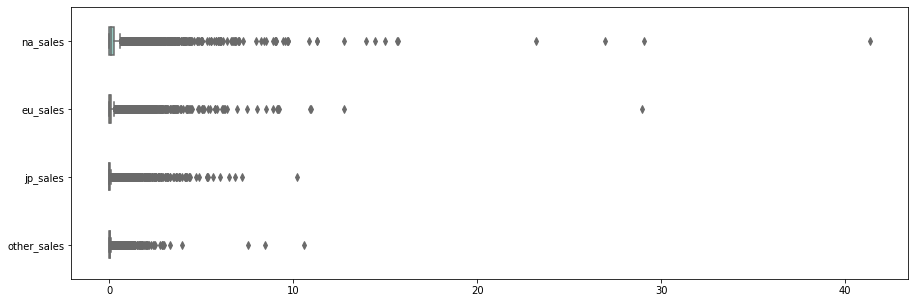

In [6]:
#Посмотрим на базовую статистику по продажам
cols_sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df[cols_sales].describe()
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[cols_sales], palette="Set3", orient='h', width=0.4)

In [7]:
#Проверим на дубликаты
df.duplicated().sum()

0

#### Вывод
В таблице 16715 строк и 11 столбцов, данные охватывают период с 1980 по 2016 год. Пропуски находятся в столбцах name, year_of_release, critic_score, user_score, rating и их достаточно много, особенно в столбцах с рейтингом. Вероятно, эти данные не были доступны или не были введены в таблицу при ее заполнении. Дубликатов при первом осмотре не выявлено.   

Согласно Википедии, ESRB расшифровывается как Entertainment Software Rating Board. В данном датасете встречаются следующие категории:
- «EC» («Early childhood») — «Для детей младшего возраста»;
- «E» («Everyone») — «Для всех», первоначально "K-A" ("Kids to Adults") - соответственно, надо будет произвести замену значений;
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;
- «T» («Teen») — «Подросткам»;
- «M» («Mature») — «Для взрослых»;
- «AO» («Adults Only 18+») — «Только для взрослых»;
- «RP» («Rating Pending») — «Рейтинг ожидается» - это малоинформативно для наших исследовательский целей, его можно обозначить так же, как и пропуски - "Неизвестно". 

Необходимо произвести замены типов данных:
- на категории - platform, genre, rating;
- на int - critic_score, year_of_release;
- на float - user_score.

Данные по продажам есть по всем строкам, и предварительно видно, что больше всего продаж было в Северной Америке. Кроме того, бОльшая часть продаж - меньше миллиона, но разброс данных очень большой. Это надо будет учитывать для дальнейшего анализа.

# Шаг 2. Подготовка данных

### Заполнение пропусков

#### name и genre

In [9]:
#Проверим, если ли дубликаты значений из-за разного регистра в столбцах со строками 
#Если нет, не будет приводить к нижнему регистру для сохранения читаемости
df_str = df.copy()

col_str = ['name', 'platform', 'genre', 'rating']

for col in col_str:
    df_str[col] = df_str[col].str.lower()

df_str.duplicated().sum()

0

In [10]:
#Посмотрим на пропуски в столце name
df[df.name.isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
#Данные строки малоинформативны, их можно удалить
df.dropna(subset=['name'], inplace=True)
df.name.isnull().sum()

0

#### year_of_release

In [12]:
#Посмотрим количество пропусков в процентном соотношении
df.year_of_release.isnull().value_counts(normalize=True)

False    0.983905
True     0.016095
Name: year_of_release, dtype: float64

In [13]:
#Посмотрим на примеры строк с пропусками
df[df.year_of_release.isnull()==True].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Мы видим, что хотя строк без прописанного года всего 1%, в некоторых названиях игр встречается год их выпуска. Сделаем срез и исследуем подробнее

*Примечание - возможно, ради одного процента не стоит на реальных кейсах так все смотреть, но в данном случае это было интересно и полезно, поэтому я решила оставить.*

In [14]:
df[((df.name.str.contains('\d{4}', regex=True)) | (df.name.str.contains('\d{2}', regex=True))) 
                                                & (df.year_of_release.isnull()==True)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2479,Madden NFL 07,PSP,NaN,Sports,0.77,0.03,0.00,0.04,78.0,6.6,E
2492,MLB SlugFest 20-03,PS2,NaN,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
2849,Madden NFL 11,Wii,NaN,Sports,0.68,0.00,0.00,0.04,75.0,5.4,E
3413,Madden NFL 06,X360,NaN,Sports,0.54,0.00,0.01,0.03,74.0,4.9,E


Видно, что многие из этих игр имели неплохие продажи и у многих проставлен рейтинг, поэтому проставим им год как он есть в названии

In [15]:
#Определим индекс строк, где год прописан в названиях в четырехзначном виде в конце названия
#добавим функцию и заполним пропуски
fill_year4_index = df.index[(df.name.str.contains('\d{4}$', regex=True)) & (df.year_of_release.isnull()==True)]
fill_year4_index
df.loc[fill_year4_index]

def add_year(col):
    year = col.split(' ')[-1]
    #year = name.split(' ')[-1]
    return year

df.loc[fill_year4_index, 'year_of_release'] = df.loc[fill_year4_index, 'name'].apply(add_year)

#Проверим
df.loc[fill_year4_index]


Int64Index([  183,   377,   475,  1650,  3486,  4775,  5156,  5655,  5889,
             8918, 13195, 13929, 15953, 16079, 16373],
           dtype='int64')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E
5889,NBA Live 2003,GC,NaN,Sports,0.23,0.06,0.00,0.01,82.0,8.2,E
8918,All-Star Baseball 2005,XB,NaN,Sports,0.11,0.03,0.00,0.01,75.0,8.8,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2004,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,2004,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,2006,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,2003,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
3486,Madden NFL 2002,XB,2002,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,2003,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
5156,NBA Live 2003,XB,2003,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5655,All-Star Baseball 2005,PS2,2005,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E
5889,NBA Live 2003,GC,2003,Sports,0.23,0.06,0.00,0.01,82.0,8.2,E
8918,All-Star Baseball 2005,XB,2005,Sports,0.11,0.03,0.00,0.01,75.0,8.8,E


In [16]:
#Сделаем то же самое для строк, где год прописан в названиях в двухзначном виде
fill_year2_index = df.index[(df.name.str.contains('\s\d{2}$', regex=True)) & (df.year_of_release.isnull()==True)]
fill_year2_index
df.loc[fill_year2_index]

def add_year(col):
    year = col.split(' ')[-1]
    if int(year) <= 16:
        return '20'+year
    elif int(year) >= 80:
        return '19'+ year

df.loc[fill_year2_index, 'year_of_release'] = df.loc[fill_year2_index, 'name'].apply(add_year)
df.loc[fill_year2_index]

Int64Index([1301, 2479, 2849, 3413, 4205, 7605], dtype='int64')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
2479,Madden NFL 07,PSP,NaN,Sports,0.77,0.03,0.00,0.04,78.0,6.6,E
2849,Madden NFL 11,Wii,NaN,Sports,0.68,0.00,0.00,0.04,75.0,5.4,E
3413,Madden NFL 06,X360,NaN,Sports,0.54,0.00,0.01,0.03,74.0,4.9,E
4205,Tiger Woods PGA Tour 07,Wii,NaN,Sports,0.43,0.00,0.00,0.04,71.0,6.9,E
7605,Famista 64,N64,NaN,Sports,0.00,0.00,0.17,0.03,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1301,Triple Play 99,PS,1999,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
2479,Madden NFL 07,PSP,2007,Sports,0.77,0.03,0.00,0.04,78.0,6.6,E
2849,Madden NFL 11,Wii,2011,Sports,0.68,0.00,0.00,0.04,75.0,5.4,E
3413,Madden NFL 06,X360,2006,Sports,0.54,0.00,0.01,0.03,74.0,4.9,E
4205,Tiger Woods PGA Tour 07,Wii,2007,Sports,0.43,0.00,0.00,0.04,71.0,6.9,E
7605,Famista 64,N64,None,Sports,0.00,0.00,0.17,0.03,NaN,NaN,NaN


In [17]:
#Посмотрим еще на строки, где год идет не последним
df[((df.name.str.contains('\d{4}', regex=True)) | (df.name.str.contains('\d{2}', regex=True))) 
                                  & (df.year_of_release.isnull()==True)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2492,MLB SlugFest 20-03,PS2,NaN,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
5336,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M
6266,Indy 500,2600,NaN,Racing,0.26,0.01,0.00,0.00,NaN,NaN,NaN
6954,Jet X20,PS2,NaN,Racing,0.11,0.09,0.00,0.03,NaN,NaN,NaN
7605,Famista 64,N64,None,Sports,0.00,0.00,0.17,0.03,NaN,NaN,NaN
12046,Drake of the 99 Dragons,XB,NaN,Shooter,0.05,0.01,0.00,0.00,22.0,1.8,T
16293,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [18]:
#Заполним пару оставшихся значений вручную 
df.loc[2572, 'year_of_release'] = 2009
df.loc[5336, 'year_of_release'] = 2013
df.loc[[2572]]
df.loc[[5336]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2572,PES 2009: Pro Evolution Soccer,PSP,2009,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5336,Tomb Raider (2013),PC,2013,Action,0.06,0.25,0.0,0.04,86.0,8.5,M


In [19]:
#Заполним остальные пропуски нулями
df['year_of_release'] = df['year_of_release'].fillna(0)
df['year_of_release'].isnull().sum()

#Изменим тип на int
df['year_of_release'] = df['year_of_release'].astype(int)
df.year_of_release.dtype

0

dtype('int64')

#### critic_score, user_score, rating

In [20]:
#Посмотрим соотношение отсутствующих значений к общему их количеству
cols_rating = ['critic_score', 'user_score', 'rating']

df[cols_rating].isnull().sum()/ len(df)

critic_score    0.513133
user_score      0.400826
rating          0.404715
dtype: float64

In [21]:
#Посмотрим на строки с tbd
df[df.user_score == 'tbd'].head(10)

len(df[df.user_score == 'tbd'])/ len(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


0.14503679770238737

Обозначение tbd идет от англ. 'To Be Decided', соответственно, данные добавили в таблицу до того, как получили рейтинг пользователей. Строк с таким значением в пользовательском рейтинге 2424, или 14.5%.

Рейтинги нельзя заполнить средними, поэтому мы их заменим на 0 (при необходимости можно отфильтровать на это значение), и потом изменим тип данных. При этом в итоге примерно на половине данных не будет значений по рейтингу, это надо будет учитывать при дальнейшем анализе.

In [22]:
#Заполним пропуски и заменим типы данных
df['critic_score'] = df['critic_score'].fillna(0)
df['critic_score'] = df['critic_score'].astype(int)
df.loc[(df['user_score'] == 'tbd') | (df['user_score'].isnull()), 'user_score'] = 0
df['user_score'] = pd.to_numeric(df['user_score'])

In [23]:
#Произведем замены в рейтинге
df.loc[(df['rating'].isnull() | (df['rating'] == 'RP')) , 'rating'] = 'Неизвестно'
df.loc[df['rating'] == 'K-A' , 'rating'] = 'E'

#Проверим все вместе
df[cols_rating].isnull().sum()
df[cols_rating].dtypes

critic_score    0
user_score      0
rating          0
dtype: int64

critic_score      int64
user_score      float64
rating           object
dtype: object

In [24]:
#Заменим на категории
cols_cat = ['platform', 'genre', 'rating']

for col in cols_cat:
    df[col] = df[col].astype('category')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null category
year_of_release    16713 non-null int64
genre              16713 non-null category
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null int64
user_score         16713 non-null float64
rating             16713 non-null category
dtypes: category(3), float64(5), int64(2), object(1)
memory usage: 1.8+ MB


#### Суммарные продажи во всех регионах

In [26]:
#Создадим новый столбец по сумммарным продажам
df['total_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,Неизвестно,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,Неизвестно,31.38


**Вывод**

Были приведены к нижнему регистру названия столбцов.

Где возможно, были добавлены года выпуска основываясь на названиях игр. Также были удалены две строки без названия игр как малоинформативные. Остальные пропуски были заполнены 0, так как их нельзя заполнить средними значениями - даже на одной и той же платформе одного жанра игры могут иметь очень разный рейтинг.

Затем данные были преобразованы в нужные типы - platform, genre, rating - в категории для экономии памяти, группировки и построения необходимых графиков; critic_score, year_of_release - в int, так как там только целые значения; user_score - из объекта в float для выполнения численных преобразований или группировок.

Наконец, был добавлен столбец по суммарным продажам - total_sales. 

# Шаг 3. Исследовательский анализ данных

### Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?

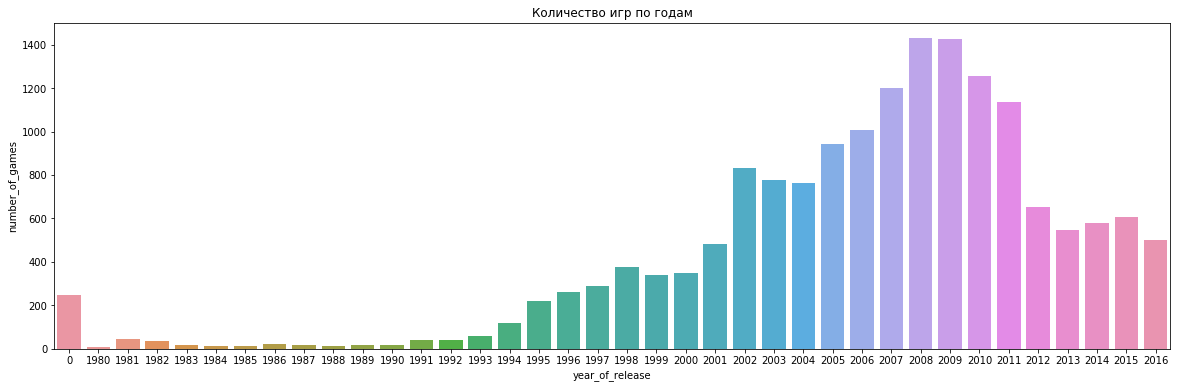

In [27]:
#Сделаем сводную таблицу и построим график
games_years = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
_ = plt.figure(figsize=(20,6))
_ = sns.barplot(x=games_years.index, y='name', data=games_years)
_ = plt.title('Количество игр по годам')
_ = plt.ylabel('number_of_games')

In [28]:
#Посмотрим на точные цифры
games_years.reset_index(inplace=True)
games_years.columns = ['year_of_release', 'number_of_games']
games_years.sort_values(by='number_of_games', ascending=False)

,year_of_release,number_of_games
29,2008,1429
30,2009,1427
31,2010,1255
28,2007,1200
32,2011,1138
27,2006,1009
26,2005,941
23,2002,830
24,2003,779
25,2004,764


График показывает, что данные за продажи ранее, чем за 1995 не представляют большого интереса. Достаточно явный скачок по количеству игр, выпущенных в год, произошел в 2002 году. Максимальное количество игр было выпущено в 2008-2009 гг - около 1430 в год. После этого начался спад, вероятно связанный с тем, что более популярны начали становиться онлайн игры и игры на мобильных телефонах.

### Как менялись продажи по платформам?

In [29]:
#Сделаем сводную таблицу по платформам
platform_years = df.query('year_of_release >= 1995')\
                   .pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
platform_years.columns = platform_years.columns.astype('str')

#Добавим столбцы по суммарным продажам и количеству активных лет
platform_years['sales_per_platform'] = platform_years.sum(axis=1)
platform_years['num_of_active_years'] = platform_years.count(axis=1)
platform_years.head()

year_of_release,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,sales_per_platform,num_of_active_years
platform,,,,,,,,,,,,,,,,,,,,,
3DO,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,2
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14,257.81,7
DC,NaN,NaN,NaN,3.38,5.16,5.99,1.07,0.29,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.95,8
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.27,...,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN,802.77,11
GB,3.60,36.03,6.37,26.90,38.00,19.76,9.24,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.90,8


count    26.000000
mean      8.192308
std       4.604513
min       2.000000
25%       5.250000
50%       8.000000
75%      10.750000
max      23.000000
Name: num_of_active_years, dtype: float64

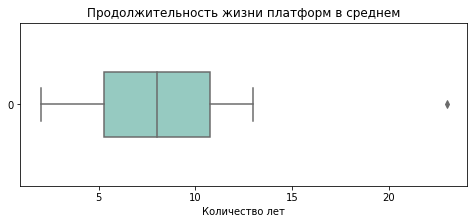

In [30]:
#Посмотрим на среднюю продолжительность "жизни" платформы
_ = plt.figure(figsize=(8, 3))
_ = sns.boxplot(data=platform_years['num_of_active_years'], palette="Set3", orient='h', width=0.4)
_ = plt.title('Продолжительность жизни платформ в среднем')
_ = plt.xlabel('Количество лет')
platform_years['num_of_active_years'].describe()

В среднем, платформы приносят деньги около 8 лет. 

In [31]:
#Посмотрим на топ-10 самых прибыльных платформ
profitable_platforms = platform_years[['sales_per_platform', 'num_of_active_years']]\
                                     .sort_values(by='sales_per_platform', ascending=False).head(10)
profitable_platforms

profitable_platforms_list = profitable_platforms.index.to_list()
profitable_platforms_list

year_of_release,sales_per_platform,num_of_active_years
platform,,
PS2,1247.28,13
X360,961.88,13
PS3,931.34,12
Wii,892.37,12
DS,802.77,11
PS,723.01,10
PS4,314.14,5
GBA,312.88,9
PSP,291.18,13


['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

Итак, самые прибыльные платформы - PS2, X360, PS3, Wii, DS, PS - с суммарными продажами от 730 млн до 1,255 млдр долларов. Примечательно, что все они продержались на рынке дольше среднего количества лет.

In [32]:
#Сделаем сводную таблицу по годам, отбросив данные дальше 1995 года и взяв топ 10 прибыльных платформ
year_platforms = df.query('(year_of_release >= 1995) & (platform.isin(@profitable_platforms_list))')\
                   .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
year_platforms.columns = year_platforms.columns.astype('str')

year_platforms.head()

platform,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1995,NaN,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,145.99,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 1080x432 with 0 Axes>

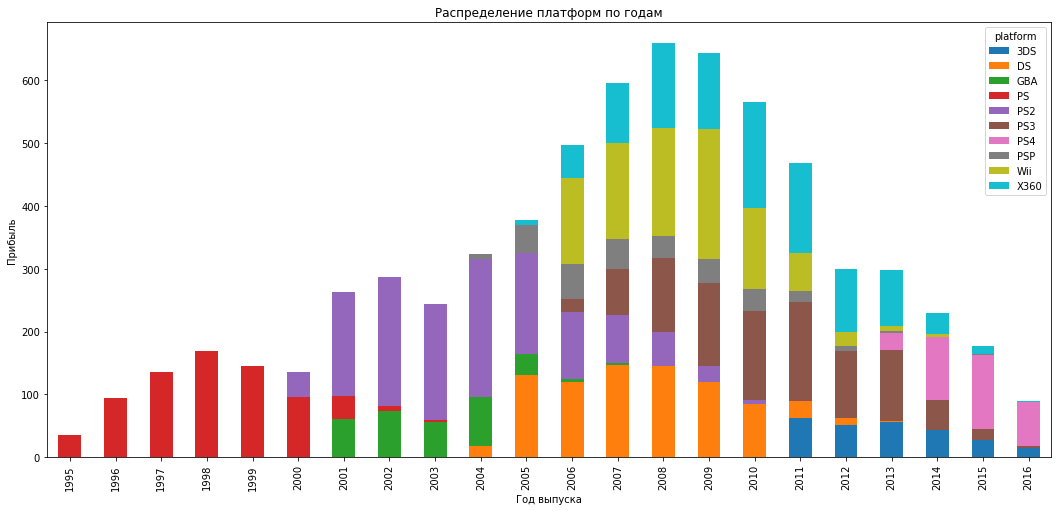

In [33]:
#Построим распределение по годам, чтобы посмотреть, как появляются новые и исчезают старые платформы.
_ = plt.figure(figsize=(15, 6))
_ = sns.color_palette('Set3')
_ = year_platforms.plot(kind='bar', stacked=True, figsize=(18,8))
_ = plt.title('Распределение платформ по годам')
_ = plt.xlabel('Год выпуска')
_ = plt.ylabel('Прибыль')

График показывает, что,  несмотря на среднюю продолжительность жизни в 8 лет, большинство платформ наиболее активны на протяжении 5-6 лет, а затем их доля значительно уменьшается на рынке. 

### Выбор актуального периода

Возьмем данные за период с 2013 года. Это время появления и распространения платформы PS4. Учитывая, что средний период активности платформы - 5-6 лет, она точно будет актуальна в 2017 году. Также платформа X360 еще действует в этот период, и, учитывая, что данные за 2016 год могут быть неполными, она тоже может еще представлять некоторый интерес. Возможно, как только мы сделаем срез с 2013 года появятся еще платформы, которые нет на выше представленном графике. 

In [34]:
#Сделаем новую таблицу с данными начиная с 2013 года
actual_data = df[df.year_of_release >= 2013].copy()
actual_data['platform'] = actual_data['platform'].cat.remove_unused_categories()
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2234 entries, 16 to 16714
Data columns (total 12 columns):
name               2234 non-null object
platform           2234 non-null category
year_of_release    2234 non-null int64
genre              2234 non-null category
na_sales           2234 non-null float64
eu_sales           2234 non-null float64
jp_sales           2234 non-null float64
other_sales        2234 non-null float64
critic_score       2234 non-null int64
user_score         2234 non-null float64
rating             2234 non-null category
total_sales        2234 non-null float64
dtypes: category(3), float64(6), int64(2), object(1)
memory usage: 182.2+ KB


### Какие платформы лидируют по продажам, растут или падают?

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.73,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


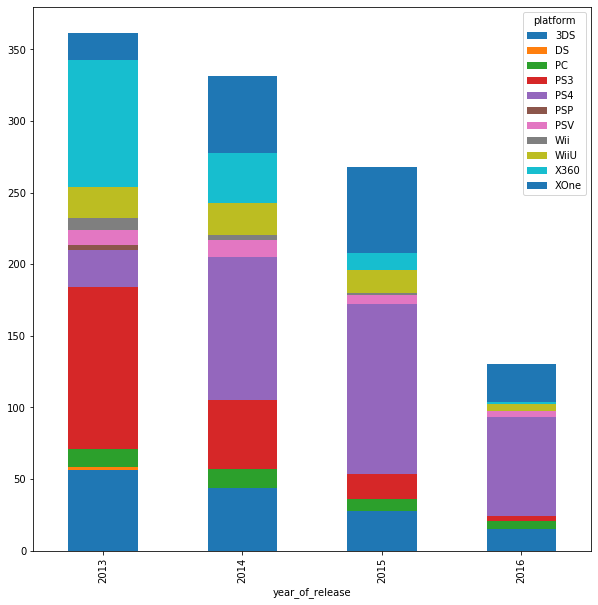

In [35]:
#Построим похожий график на данных с 2013 года, чтобы посмотреть активность других платформ 
year_2013 = actual_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
year_2013.columns = year_2013.columns.astype('str')
year_2013
_ = year_2013.plot(kind='bar', stacked=True, figsize=(10,10))

График показывает, что доля прибыли по платформам DS, PS3, PSP, Wii и X360 падает, что логично, так как выходят их новые поколения (например, PS4 вместо PS3, WiiU вместо Wii,  XOne вместо X360).  
Таким образом, мы продолжаем анализировать платформы 3DS, PC, PS4, PSV, WiiU, XOne. Посмотрим по ним статистику и построим boxplot'ы. 

In [36]:
#Посмотрим на базовую статистикупо продажам, сгруппировав по платформам. Отсортируем по среднему
cols_platforms = ['3DS', 'PC', 'PS4', 'PSV', 'WiiU', 'XOne']
actual_data.query('platform in @cols_platforms').groupby('platform')['total_sales']\
        .describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39
WiiU,115.0,0.562000,1.038778,0.01,0.06,0.20,0.595,7.09
3DS,303.0,0.472772,1.381347,0.01,0.04,0.09,0.280,14.60
PC,190.0,0.209368,0.351521,0.01,0.03,0.08,0.230,3.05
PSV,358.0,0.092151,0.153816,0.01,0.02,0.04,0.110,1.96
DS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PSP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Базовая статистика показывает, что разброс данных по продажам очень большой, и среднее значительно больше медианы из-за большого количества выбросов. Для наглядности для оценки средних построим «ящик с усами».

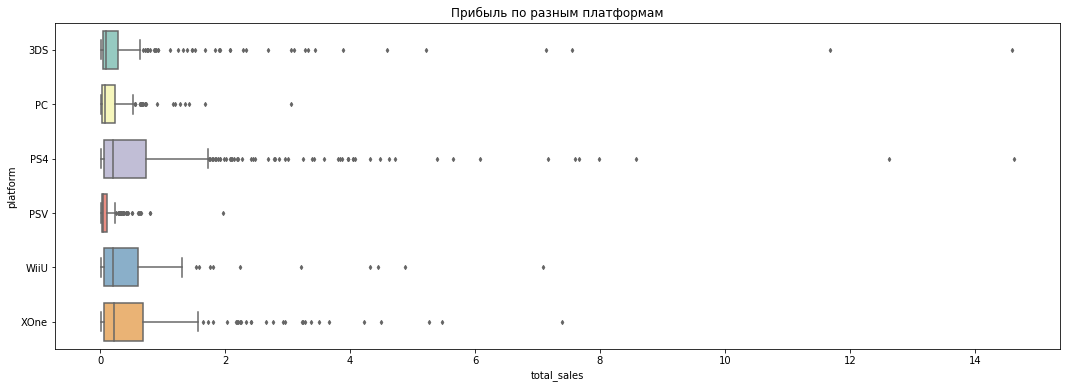

In [37]:
top_6_profit = actual_data.query('platform in @cols_platforms').copy()
top_6_profit['platform'] = top_6_profit['platform'].cat.remove_unused_categories()
_ = plt.figure(figsize=(18, 6))
_ = sns.boxplot(data=top_6_profit, x='total_sales', y='platform',  palette="Set3", orient='h', width=0.7, fliersize=3)
_ = plt.title('Прибыль по разным платформам')

График показывает, что у платформ PS4, WiiU и XOne выше медиана и бОльшее количество прибыльных игр (что видно по длинным "усам" ящика и выбросам). Также много выбросов у платформы 3DS, и хотя медиана у нее меньше, есть очень дорогие игры, которые принесли 12 и 14 млн.

In [38]:
#Наконец, посмотрим на суммарное количество продаж на этих платформах
top_6_profit_total = top_6_profit.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
           .sort_values(by='total_sales', ascending=False)

top_6_profit_total

,total_sales
platform,
PS4,314.14
XOne,159.32
3DS,143.25
WiiU,64.63
PC,39.78
PSV,32.99


Итого, сводная таблица подтверждает наши выводы по графикам, показывая, что **в 2017 необходимо продвигать игры на платформах PS4, XOne, и 3DS**. Платформа **WiiU скорее заканчивает свой цикл существования**, и суммарные продажи по ней уже более чем в два раза меньше, чем у 3DS.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?

'PS4'

,critic_score,total_sales,user_score
critic_score,1.000000,0.406568,0.557654
total_sales,0.406568,1.000000,-0.031957
user_score,0.557654,-0.031957,1.000000


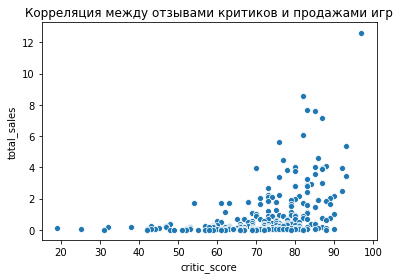

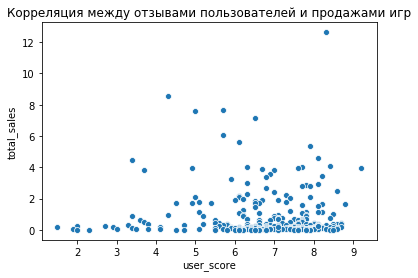

'XOne'

,critic_score,total_sales,user_score
critic_score,1.000000,0.416998,0.472462
total_sales,0.416998,1.000000,-0.068925
user_score,0.472462,-0.068925,1.000000


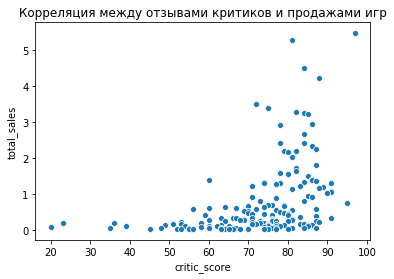

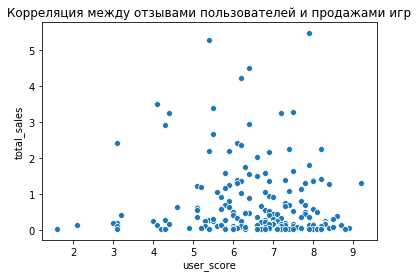

'3DS'

,critic_score,total_sales,user_score
critic_score,1.000000,0.357057,0.769536
total_sales,0.357057,1.000000,0.241504
user_score,0.769536,0.241504,1.000000


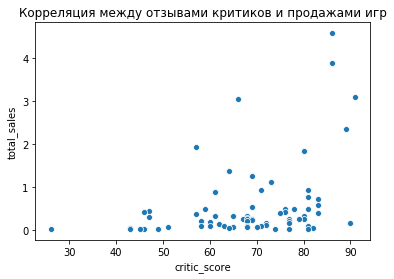

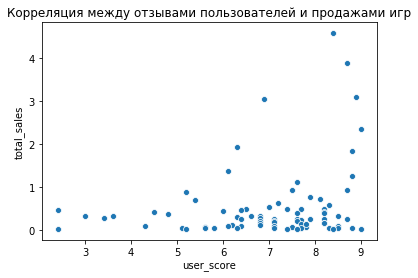

In [39]:
#Выделим платформы для анализа корреляций между отзывами и продажами
platforms_rating = ['PS4', 'XOne', '3DS']

#Выведем в цикле корреляцию и построим диаграмму расслеяния
for plat in platforms_rating:
    plat
    data = actual_data.query('(platform == @plat) & (critic_score > 0)')[['name', 'critic_score', 'total_sales']]\
     .merge(actual_data.query('(platform == @plat) & (user_score > 0)')[['name', 'user_score', 'total_sales']], how='outer')
    data.corr()
    _ = sns.scatterplot(x='critic_score', y='total_sales', data=data)
    _ = plt.title('Корреляция между отзывами критиков и продажами игр')
    plt.show()
    _ = sns.scatterplot(x='user_score', y='total_sales', data=data)
    _ = plt.title('Корреляция между отзывами пользователей и продажами игр')
    plt.show()

Для платформы-лидера **PS4** *корреляция между отзывами критиков и продажами игр - слабо-средняя (0.4) положительная*, то есть чем выше рейтинг, тем выше продажи, но это не очень выражено. *Корреляция между отзывами пользователей и продажами игр отсутствует*, то есть рейтинг пользователей не влияет на продажи игр.

**Для XOne** корреляции *такие же*, а для **3DS** *корреляция между отзывами критиков и продажами игр* - *еще слабее* (0.35), а корреляция *между отзывами пользователей и продажами игр*, наоборот, есть *положительная*, но тоже *очень слабая* (0.24), рейтинг пользователей оказывает малое влияние на продажи игр. 

### Самые прибыльные жанры?

In [40]:
#Посмотрим на общее распределение игр по жанрам
genre_sales = actual_data.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'mean', 'median'])
genre_sales.columns = ['sum', 'mean', 'median']
genre_sales.sort_values(by='mean', ascending=False)

,sum,mean,median
genre,,,
Shooter,232.98,1.245882,0.450
Sports,150.65,0.703972,0.240
Platform,42.63,0.576081,0.225
Role-Playing,145.89,0.499623,0.125
Racing,39.89,0.469294,0.120
Fighting,35.31,0.441375,0.125
Action,322.22,0.420104,0.110
Misc,62.82,0.405290,0.100
Simulation,21.76,0.350968,0.100


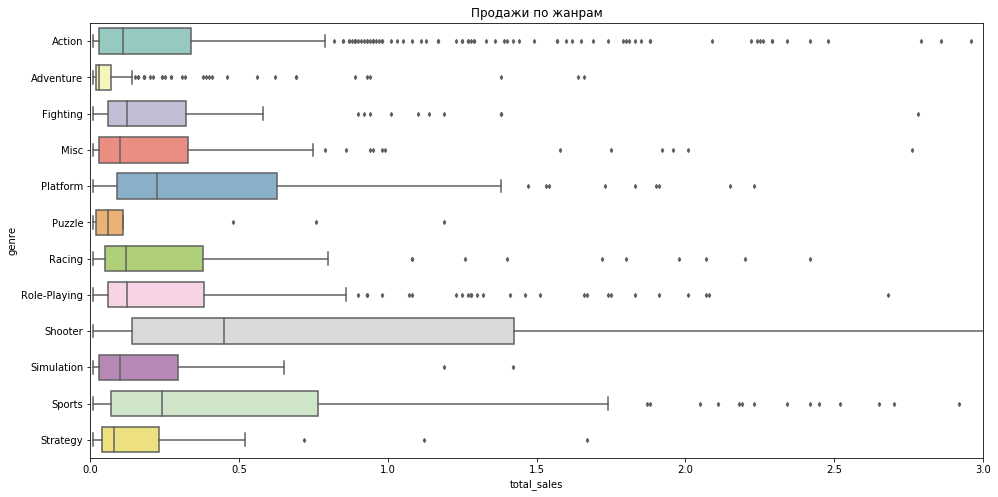

In [41]:
#Для наглядности оценки средних построим boxplot
_ = plt.figure(figsize=(16, 8))
_ = sns.boxplot(data=actual_data, x='total_sales', y='genre',  palette="Set3", orient='h', width=0.7, fliersize=3)
_ = plt.xlim(0, 3)
_ = plt.title('Продажи по жанрам')

По суммарному количеству продаж самые прибыльные жанры - Action (322 млн), Shooter (232 млн), Sports (150 млн) и Role-Playing (145 млн). Наименее прибыльные - Strategy (10) и Puzzle (3).

Интересно заметить, что если, смотреть на средние значения, можно выделить следующие закономерности:
- у Shooter среднее и медиана по продажам почти в три раза выше, чем у Action, где, в свою очередь, вероятно, наибольшее количество одиночных удачных прибыльных игр;
- Среднее и медиана Action находятся на 6 месте после Shooter, Sports, Platform, Role-Playing, Racing и Fighting;
- Среднее и медиана Platform (это тип Action игр) находится выше Role-Playing;
- много прибыльных игр выпускается в Sports (длинный "ус" на графике).

In [42]:
#Посмотрим на распределение жанров у ведущих платформ
top3 = ['PS4', 'XOne', '3DS']
genre_sales_top3 = actual_data.query('(platform in @top3) & (genre in ("Action", "Shooter", "Sports", "Role-Playing"))')\
                .pivot_table(index='genre', columns='platform', values='total_sales', aggfunc=['sum', 'mean', 'median'])    
genre_sales_top3

sum                    mean                     median         \
platform        3DS    PS4   XOne       3DS       PS4      XOne    3DS    PS4   
genre                                                                           
Action        34.04  96.10  37.31  0.293448  0.667361  0.438941  0.070  0.155   
Role-Playing  67.37  28.99  10.55  1.086613  0.568431  0.753571  0.175  0.200   
Shooter        0.06  88.56  60.33  0.060000  2.160000  1.587632  0.060  0.970   
Sports         1.82  55.61  26.74  0.227500  1.208913  0.703684  0.185  0.525   

                     
platform       XOne  
genre                
Action        0.150  
Role-Playing  0.320  
Shooter       1.095  
Sports        0.335

Более детальная таблица показывает, что суммарно на платформе 3DS наибольшую прибыль приносит жанр Role-Playing, на PS4 - Action и Shooter, а на XOne - Shooter.



# Шаг 4. Составление портрета пользователя каждого региона

#### Самые популярные платформы (топ-5)

In [43]:
#Выделим столбцы с регионами и выведем топ 5 популярных платформ для каждого
region_cols = ['na_sales', 'eu_sales', 'jp_sales']

for col in region_cols:
    col
    sales_per_region = actual_data.pivot_table(index='platform', values=col, aggfunc='sum')\
                                  .sort_values(by=col, ascending=False).head()
    sales_per_region['ratio'] = round(sales_per_region[col]/sales_per_region[col].sum(), 2)
    sales_per_region

'na_sales'

,na_sales,ratio
platform,,
PS4,108.74,0.28
XOne,93.12,0.24
X360,81.66,0.21
PS3,63.50,0.16
3DS,38.20,0.10


'eu_sales'

,eu_sales,ratio
platform,,
PS4,141.09,0.42
PS3,67.81,0.20
XOne,51.59,0.15
X360,42.52,0.13
3DS,30.96,0.09


'jp_sales'

,jp_sales,ratio
platform,,
3DS,67.81,0.50
PS3,23.35,0.17
PSV,18.59,0.14
PS4,15.96,0.12
WiiU,10.88,0.08


В **Северной Америке** и в **Европе** *одни и те же платформы в пятерке лидеров*, при этом они *распределяются по-разному*. В Северной Америке самые популярные платформы у PS4, XOne и X360 примерно одинаковая доля в 20-25%, и PS3 с 3DS занимают примерно по 10%. 
В Европе PS4 более популярна и занимает 40% процентов рынка. Далее следует PS3 с 20% и остальные платформы (XOne, X360,3DS)  занимают около 10%. 

В **Японии** лидируют *другие платформы*. Половину рынка занимает 3DS, за ней идут PS3, PSV, PS4 и WiiU с долями 10-15%. Возможно, это связано с другим меналитетом игроков.  

#### Самые популярные жанры (топ-5)

In [44]:
#Выделим столбцы с регионами и выведем топ 5 популярных платформ для каждого
for col in region_cols:
    col
    sales_per_region = actual_data.pivot_table(index='genre', values=col, aggfunc='sum')\
                                  .sort_values(by=col, ascending=False).head()
    sales_per_region['ratio'] = round(sales_per_region[col]/sales_per_region[col].sum(), 2)
    sales_per_region

'na_sales'

,na_sales,ratio
genre,,
Action,126.11,0.34
Shooter,109.74,0.29
Sports,65.27,0.17
Role-Playing,46.40,0.12
Misc,27.49,0.07


'eu_sales'

,eu_sales,ratio
genre,,
Action,118.38,0.37
Shooter,87.86,0.27
Sports,60.52,0.19
Role-Playing,36.97,0.11
Racing,20.19,0.06


'jp_sales'

,jp_sales,ratio
genre,,
Role-Playing,51.04,0.44
Action,40.49,0.35
Misc,9.20,0.08
Fighting,7.65,0.07
Shooter,6.61,0.06


В **Северной Америке** и в **Европе** почти одни и те же жанры в пятерке лидеров, и они распределяются примерно одинаково. Более популярные - *Action и Shooter* (доля примерно по 30%). На 3й и 4й строках - *Sports и Role-Playing* (доля примерно по 20%). В Америке на 5й строке игры в жанре Misc, а в Европе - Racing, но оба жанра занимают всего 6-7% рынка.

В **Японии** другой набор популярных жанров. Два наиболее популярных - Role-Playing (45%) и Action (35%), далее следуют Misc, Fighting и Shooter с долями около 7%. Интересно отметить, что в отличие от других двух регионов, Shooter в Японии малопопулярен. Опять же, это может объясняться различием менталитетов. 

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [45]:
for col in region_cols:
    col
    sales_per_region = actual_data[actual_data['rating'] != 'Другое']\
                      .pivot_table(index='rating', values=col, aggfunc='sum')\
                      .sort_values(col, ascending=False)
    sales_per_region['ratio'] = round(sales_per_region[col] / sales_per_region[col].sum(), 2)
    sales_per_region

'na_sales'

,na_sales,ratio
rating,,
M,165.27,0.38
Неизвестно,89.42,0.20
E,79.05,0.18
E10+,54.24,0.12
T,49.79,0.11
AO,0.00,0.00
EC,0.00,0.00


'eu_sales'

,eu_sales,ratio
rating,,
M,145.57,0.37
E,83.36,0.21
Неизвестно,78.91,0.20
E10+,42.69,0.11
T,41.95,0.11
AO,0.00,0.00
EC,0.00,0.00


'jp_sales'

,jp_sales,ratio
rating,,
Неизвестно,85.05,0.60
T,20.59,0.15
E,15.14,0.11
M,14.11,0.10
E10+,5.89,0.04
AO,0.00,0.00
EC,0.00,0.00


В **Северной Америке** и в **Европе** рейтинг влияет на продажи **примерно одинаково**. В основном пользуются популярности игры *для взрослых (около 40% игр)*, следом идет *игры для всех (20%)* и игры с неизвестным рейтингом. Меньше всего игр от 10 лет и для подростков (по 10%). 

В **Японии** опять **ситуация иная**. Для большинства игр рейтинг не известен, возможно вообще эти данные малодоступны. *15% игр - игр для подростков*, по *10% - для всех и для взрослых*. Менее всего пользуются спросом игры с рейтингом от 10 лет и выше. 

# Шаг 5. Проверка гипотез

Необходимо проверить следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

Мы имеем две независимые выборки - пользователи разных платформ или разных жанров, поэтому будем применять ttest_ind из пакета scipy.stat - надо определить, значима ли разница между средними выборок учитывая их дисперсию. Добавим аргумент equal_var=False, так как анализ выше показал, что дисперсии выборок отличаются. 
Возьмем пороговое значение alpha 0.5 как стандартное.

Нулевая гипотеза формулируется так, чтобы можно было использовать знак равенства. Таким образом получаем следующий набор гипотез:

- Сравнение пользовательских рейтингов платформ Xbox One и PC:
     - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые,
     - Средние пользовательские рейтинги платформ Xbox One и PC различаются.
- Сравнение пользовательских рейтингов жанров Action и Sports:
     - Средние пользовательские рейтинги жанров Action и Sports одинаковые,
     - Средние пользовательские рейтинги жанров Action и Sports различаются.
     

In [46]:
#Сделаем срезы
xone_ratings = actual_data.query('(platform == "XOne") & (user_score > 0)')[['user_score']].copy()
pc_ratings = actual_data.query('(platform == "PC") & (user_score > 0)')[['user_score']].copy()
xone_ratings['platform'] = 'XOne'
pc_ratings['platform'] = 'PC'

#Посмотрим на статистику
xone_ratings.append(pc_ratings).groupby('platform')['user_score'].agg(['mean', 'std'])

,mean,std
platform,,
PC,6.283974,1.745908
XOne,6.521429,1.380941


In [47]:
#Проверим первую пару гипотез
h0_1 = 'средние пользовательские рейтинги платформ Xbox One и PC одинаковые'
h1_1 = 'средние пользовательские рейтинги платформ Xbox One и PC различаются'
alpha = .05

results = st.ttest_ind(xone_ratings['user_score'], pc_ratings['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу. Иначе говоря,", h1_1)
else:
    print("Не получилось отвергнуть нулевую гипотезу. Иначе говоря,", h0_1)

p-значение: 0.17156613829336056
Не получилось отвергнуть нулевую гипотезу. Иначе говоря, средние пользовательские рейтинги платформ Xbox One и PC одинаковые


In [48]:
#Сделаем срезы
action_ratings = actual_data.query('(genre == "Action") & (user_score > 0)')[['user_score']]
sport_ratings = actual_data.query('(genre == "Sports") & (user_score > 0)')[['user_score']]
action_ratings['genre'] = 'Action'
sport_ratings['genre'] = 'Sport'

#Посмотрим на статистику
action_ratings.append(sport_ratings).groupby('genre')['user_score'].agg(['mean', 'std'])

,mean,std
genre,,
Action,6.841795,1.331127
Sport,5.238125,1.783427


In [49]:
#Проверим вторую пару гипотез
h0_2 = 'средние пользовательские рейтинги жанров Action и Sports одинаковые'
h1_2 = 'средние пользовательские рейтинги жанров Action и Sports различаются'
alpha = .05

results = st.ttest_ind(action_ratings['user_score'], sport_ratings['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу. Иначе говоря,", h1_2)
else:
    print("Не получилось отвергнуть нулевую гипотезу. Иначе говоря,", h0_2)

p-значение: 1.1834440653354691e-20
Отвергаем нулевую гипотезу. Иначе говоря, средние пользовательские рейтинги жанров Action и Sports различаются


Проверка **первой гипотезы** о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, показала, что это *действительно может быть так* (эта гипотеза была взята как нулевая и её не удалось отвергнуть). Взгляд на статистику показывает, что средний рейтинг - 6.3 для PC и 6.5 для XOne, и хотя дисперсии разные, средние все равно значительно не различаются. 

Проверка **второй гипотезы** о том, что средние пользовательские рейтинги жанров Action и Sports разные позволила ее *принять* (т.к. нулевую гипотезу о том, что они равны мы отвергли). Взгляд на статистику показывает, что средний рейтинг - 6.8 для Action и 5.2 для Sport, и хотя дисперсии разные, средние все равно значительно различаются, и *для Action средний рейтинг выше*. 

# Шаг 6. Общий вывод

Был произведен анализ данных на предмет выявления определяющих успешность игры закономерностей, что бы позволило компании сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следующий год.

После **предобработки данных** были добавлены года выпуска основываясь на названиях игр. Остальные пропуски были заполнены 0, так как их нельзя заполнить средними значениями - даже на одной и той же платформе одного жанра игры могут иметь очень разный рейтинг. Затем данные были преобразованы в нужные типы для экономии памяти, дальнейшей группировки и построения необходимых графиков. Наконец, был добавлен столбец по суммарным продажам - total_sales. 

### Исследовательский анализ данных
**Сколько игр выпускалось в разные годы?**
Анализ показал, что данные за продажи ранее, чем за 1995 не представляют большого интереса. Достаточно явный скачок по количеству игр, выпущенных в год, произошел в 2002 году. Максимальное количество игр было выпущено в 2008-2009 гг - около 1430 в год. После этого начался спад, вероятно связанный с тем, что более популярны начали становиться онлайн игры и игры на мобильных телефонах. В 2012-2016 было от 500 до 650 игр в год (по убывающей). 

**Как менялись продажи по платформам?**
В среднем, платформы приносят деньги около 8 лет, но несмотря на это, большинство платформ наиболее активны на протяжении 5-6 лет, а затем их доля значительно уменьшается на рынке.

Для анализа актуального периода были взяты данные с 2013 года - это время появления и распространения платформы PS4. На новом срезе был построен новый график по активности платформ, который показал, что **в 2017 необходимо продвигать игры на платформах PS4, XOne, и 3DS**. Платформа WiiU скорее заканчивает свой цикл существования, и суммарные продажи по ней уже более чем в два раза меньше, чем у 3DS.

**Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?**
Для платформы-лидера PS4 корреляция между отзывами критиков и продажами игр - слабо-средняя (0.4) положительная, то есть чем выше рейтинг, тем выше продажи, но это не очень выражено. Корреляция между отзывами пользователей и продажами игр отсутствует, то есть рейтинг пользователей не влияет на продажи игр.

Для XOne корреляции такие же, а для 3DS корреляция между отзывами критиков и продажами игр - еще слабее (0.35), а корреляция между отзывами пользователей и продажами игр, наоборот, есть положительная, но тоже очень слабая (0.24), рейтинг пользователей оказывает малое влияние на продажи игр.

Согласно данному датасету, **в целом рейтинги не оказывают значительного влияния на продажи игр**. ОДнако надо учитывать, что изначально данные по рейтингу были примерно на половине данных, поэтому этот показатель может поменяться на другой выборке. 

**Самые прибыльные жанры?**
По суммарному количеству продаж самые прибыльные жанры - **Action (322 млн), Shooter (232 млн), Sports (150 млн) и Role-Playing (145 млн)**. Наименее прибыльные - Strategy (10) и Puzzle (3). Интересно заметить, что если, смотреть на среднее и медиану по продажам, у Shooter они почти в три раза выше, чем у Action, где, в свою очередь, вероятно, наибольшее количество одиночных удачных прибыльных игр. Среднее и медиана Action вообще находятся на 6 месте после Shooter, Sports, Platform, Role-Playing, Racing и Fighting. Есть основания полагать, что много прибыльных игр выпускается в Sports.
**По платформам - суммарно на 3DS наибольшую прибыль приносит жанр Role-Playing, на PS4 - Action и Shooter, а на XOne - Shooter.**

### Портрет пользователя каждого региона
**Платформы**
В Северной Америке и в Европе одни и те же платформы в пятерке лидеров, при этом они распределяются по-разному. В Северной Америке самые популярные платформы у PS4, XOne и X360 примерно одинаковая доля в 20-25%, и PS3 с 3DS занимают примерно по 10%. 
В Европе PS4 более популярна и занимает 40% процентов рынка. Далее следует PS3 с 20% и остальные платформы (XOne, X360,3DS)  занимают около 10%. 

В Японии лидируют другие платформы. Половину рынка занимает 3DS, за ней идут PS3, PSV, PS4 и WiiU с долями 10-15%. Возможно, это связано с другим меналитетом игроков.  

**Жанры**
В Северной Америке и в Европе почти одни и те же жанры в пятерке лидеров, и они распределяются примерно одинаково. Более популярные - Action и Shooter (доля примерно по 30%). На 3й и 4й строках - Sports и Role-Playing (доля примерно по 20%). В Америке на 5й строке игры в жанре Misc, а в Европе - Racing, но оба жанра занимают всего 6-7% рынка.

В Японии другой набор популярных жанров. Два наиболее популярных - Role-Playing (45%) и Action (35%), далее следуют Misc, Fighting и Shooter с долями около 7%. Интересно отметить, что в отличие от других двух регионов, Shooter в Японии малопопулярен. Опять же, это может объясняться различием менталитетов.

**Рейтинг**
В Северной Америке и в Европе рейтинг влияет на продажи примерно одинаково. В основном пользуются популярности игры для взрослых (около 40% игр), следом идет игры для всех (20%) и игры с неизвестным рейтингом. Меньше всего игр от 10 лет и для подростков (по 10%).

В Японии опять ситуация иная. Для большинства игр рейтинг не известен, возможно вообще эти данные малодоступны. 15% игр - игр для подростков, по 10% - для всех и для взрослых. Менее всего пользуются спросом игры с рейтингом от 10 лет и выше.

### Проверка гипотез
Проверка **первой гипотезы** о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, показала, что это *действительно может быть так* (эта гипотеза была взята как нулевая и её не удалось отвергнуть). Взгляд на статистику показывает, что средний рейтинг - 6.3 для PC и 6.5 для XOne, и хотя дисперсии разные, средние все равно значительно не различаются. 

Проверка **второй гипотезы** о том, что средние пользовательские рейтинги жанров Action и Sports разные позволила ее *принять* (т.к. нулевую гипотезу о том, что они равны мы отвергли). Взгляд на статистику показывает, что средний рейтинг - 6.8 для Action и 5.2 для Sport, и хотя дисперсии разные, средние все равно значительно различаются, и *для Action средний рейтинг выше*. 